<a href="https://colab.research.google.com/github/Surya-0804/Pytorch/blob/main/PytorchDay2Workshopipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

In [ ]:
from torch.nn import functional as F
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
input_size = 28*28
hidden_size = 700
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.001

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    transform = transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    transform = transforms.ToTensor(),
    download=True)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False)

In [ ]:
import matplotlib.pyplot as plt

def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

def visualize(loader):
  dataiter = iter(loader)
  images, labels = next(dataiter)

  # show images
  imshow(torchvision.utils.make_grid(images))

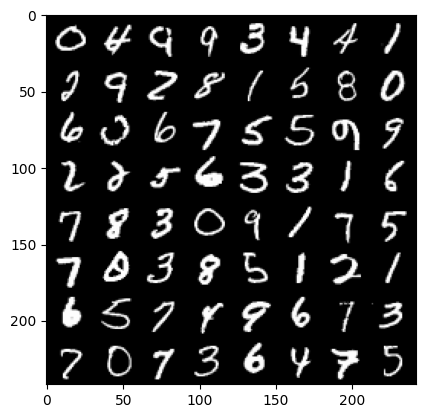

In [ ]:
visualize(train_loader)

In [ ]:
x, y = next(iter(train_loader))
print(x.shape, y.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size, bias=False),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, num_classes, bias=False),
    # torch.nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=700, bias=False)
  (1): ReLU()
  (2): Linear(in_features=700, out_features=10, bias=False)
)


In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
count_parameters(model)


555800

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from tqdm.notebook import tqdm
for epoch in tqdm(range(num_epochs)):
  for i,(images,labels) in tqdm(enumerate(train_loader)):
    flattened_images = images.reshape(-1, 28*28)
    optimizer.zero_grad()
    outputs = model(flattened_images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if((i+1)%100 == 0):
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}, Loss: {loss.item():.4f}]")


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Epoch [1/5], Step [100/938, Loss: 0.3654]
Epoch [1/5], Step [200/938, Loss: 0.1555]
Epoch [1/5], Step [300/938, Loss: 0.2300]
Epoch [1/5], Step [400/938, Loss: 0.0932]
Epoch [1/5], Step [500/938, Loss: 0.2731]
Epoch [1/5], Step [600/938, Loss: 0.1880]
Epoch [1/5], Step [700/938, Loss: 0.1975]
Epoch [1/5], Step [800/938, Loss: 0.3314]
Epoch [1/5], Step [900/938, Loss: 0.1165]


0it [00:00, ?it/s]

Epoch [2/5], Step [100/938, Loss: 0.1180]
Epoch [2/5], Step [200/938, Loss: 0.1090]
Epoch [2/5], Step [300/938, Loss: 0.1613]
Epoch [2/5], Step [400/938, Loss: 0.1120]
Epoch [2/5], Step [500/938, Loss: 0.0780]
Epoch [2/5], Step [600/938, Loss: 0.1127]
Epoch [2/5], Step [700/938, Loss: 0.0330]
Epoch [2/5], Step [800/938, Loss: 0.0330]
Epoch [2/5], Step [900/938, Loss: 0.0580]


0it [00:00, ?it/s]

Epoch [3/5], Step [100/938, Loss: 0.0563]
Epoch [3/5], Step [200/938, Loss: 0.0631]
Epoch [3/5], Step [300/938, Loss: 0.0251]
Epoch [3/5], Step [400/938, Loss: 0.2392]
Epoch [3/5], Step [500/938, Loss: 0.0187]
Epoch [3/5], Step [600/938, Loss: 0.1631]
Epoch [3/5], Step [700/938, Loss: 0.1105]
Epoch [3/5], Step [800/938, Loss: 0.1046]
Epoch [3/5], Step [900/938, Loss: 0.0162]


0it [00:00, ?it/s]

Epoch [4/5], Step [100/938, Loss: 0.1469]
Epoch [4/5], Step [200/938, Loss: 0.0537]
Epoch [4/5], Step [300/938, Loss: 0.0315]
Epoch [4/5], Step [400/938, Loss: 0.1690]
Epoch [4/5], Step [500/938, Loss: 0.0899]
Epoch [4/5], Step [600/938, Loss: 0.0079]
Epoch [4/5], Step [700/938, Loss: 0.0233]
Epoch [4/5], Step [800/938, Loss: 0.0238]
Epoch [4/5], Step [900/938, Loss: 0.0820]


0it [00:00, ?it/s]

Epoch [5/5], Step [100/938, Loss: 0.2056]
Epoch [5/5], Step [200/938, Loss: 0.0728]
Epoch [5/5], Step [300/938, Loss: 0.0177]
Epoch [5/5], Step [400/938, Loss: 0.0838]
Epoch [5/5], Step [500/938, Loss: 0.0662]
Epoch [5/5], Step [600/938, Loss: 0.0080]
Epoch [5/5], Step [700/938, Loss: 0.0294]
Epoch [5/5], Step [800/938, Loss: 0.0895]
Epoch [5/5], Step [900/938, Loss: 0.0012]


In [ ]:
with torch.no_grad():
  correct=0
  total=0
  for images,labels in test_loader:
    flattened_images=images.reshape(-1,28*28)
    outputs=model(flattened_images)
    # print(outputs.shape)
    index,predicted=torch.max(outputs.data,1)
    # print(index,predicted)
    total+=labels.size(0)
    correct += (predicted == labels).sum().item()
    break

  print(f"Accuracy: {100*correct/total:.3f}")

Accuracy: 98.438
